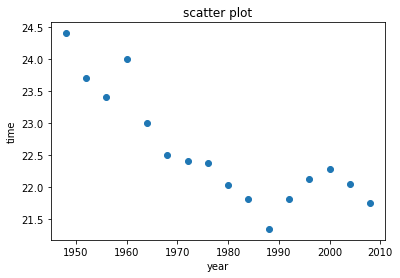

In [7]:
# Q1
# Load the data from female200.csv and create a scatter plot similar to Figure 1.1 in the textbook. 
# Does the relationship appear to be linear?
# A: Yes, it seems to have linear relationship, also a little bit of quadratc.

import matplotlib.pyplot as plt
import numpy as np
from numpy.core.numerictypes import *

year = np.array([1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008], dtype = np.float64)
time = np.array([24.4,23.7,23.4,24,23,22.5,22.4,22.37,22.03,21.81,21.34,21.81,22.12,22.27,22.05,21.74])
plt.ylabel('time')
plt.xlabel('year')
plt.title('scatter plot')
plt.scatter(year, time)

loss = 3.4188311764705728


Text(0.5, 1.0, 'Linear Regression')

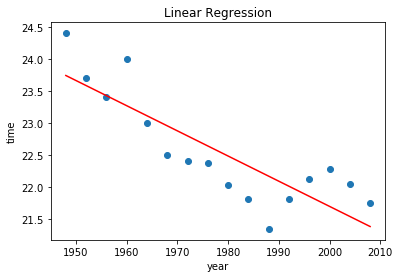

In [2]:
# Q2
# Use linear regression to fit a line to the data. Add the line to the scatterplot as in Figure 1.5 in the textbook. 
# Compute the loss for the linear model.

year_bar = np.average(year)
time_bar = np.average(time)
year_bar_square = np.average([i**2 for i in year])
yeartime_bar = np.average([year_i * time_i for year_i, time_i in zip(year, time)])


w1_hat = (yeartime_bar - year_bar * time_bar)/(year_bar_square - year_bar * year_bar)  
w0_hat = time_bar - w1_hat * year_bar

predicted_time = []
#y = w0 + w1 * x
for i in range(len(year)):
    predicted_time.append(w0_hat + year[i] * w1_hat)
loss_linear = 0
for i in range(len(time)):
    loss_linear += (predicted_time[i] - time[i])**2
print("loss = " + str(loss_linear))
plt.scatter(year, time)
plt.plot(year, predicted_time, "r")
plt.ylabel('time')
plt.xlabel('year')
plt.title('Linear Regression')

loss for 3rd order is 1.3964557322886084


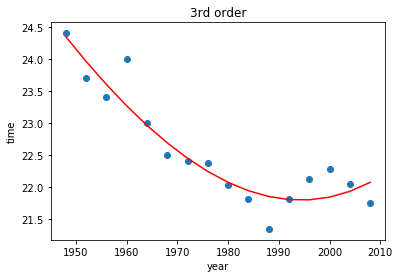

In [3]:
# Q3 
# Fit a 3rd order polynomial to the data. Compare the loss for this model with the loss for the linear model.
# A: 3rd order polynomial has less loss compare with linear regression


X = np.array([year**i for i in range(4)]).T
w = np.linalg.inv(X.T@X)@X.T@time
testt_3rd = np.dot(X,w)
plt.scatter(year, time)
plt.plot(year, testt_3rd, 'r')
plt.ylabel('time')
plt.xlabel('year')
plt.title('3rd order')

loss = 0
for i in range(len(time)):
    loss += (time[i] - testt_3rd[i])**2
print("loss for 3rd order is " + str(loss))


# from sklearn import linear_model
# x = np.array([1948.,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008])
# x_test = np.linspace(-1,1,100)
# X = np.array([x**i for i in range(4)]).T
# regr = linear_model.LinearRegression()
# regr.fit(X, time)
# plt.plot(x, regr.predict(X), "y-")

loss for 5th order is 0.8258444867825726


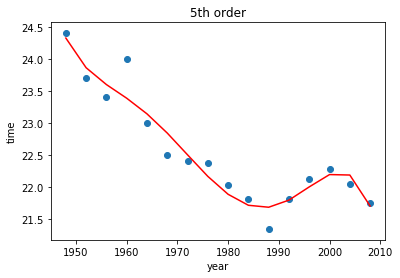

In [4]:
# Q4 
# Fit a 5th order polynomial to the data. Compare its loss to the previous two models.
# A: 5th order has least loss compare with previouse two models

# I think year will cause int overflow/float precision problem while mutiplying matrixes, so I decrease the numbers
new_year = np.array([i-1948 for i in year])
X = np.array([new_year**i for i in range(6)]).T

w = np.linalg.inv(X.T@X)@X.T@time  

testt = np.dot(X,w)
plt.scatter(year, time)
plt.plot(year, testt, 'r')
plt.ylabel('time')
plt.xlabel('year')
plt.title('5th order')
loss_5th = 0
for i in range(len(testt)):
    loss_5th += (time[i]-testt[i])**2
print("loss for 5th order is " + str(loss_5th))



Text(0.5, 1.0, '3rd V.S 5th order')

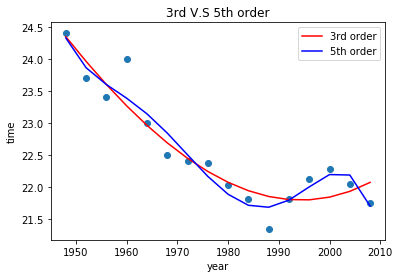

In [5]:
# Q5
# Plot the 3rd and 5th order polynomials on a scatter plot of the data. Which polynomial looks like a better model of the data?
# A: seems 5th order fits the data better

plt.scatter(year,time)
plt.plot(year, testt_3rd, 'r')
plt.plot(year, testt, 'b')
plt.legend(['3rd order', '5th order'], loc='upper right')
plt.ylabel('time')
plt.xlabel('year')
plt.title('3rd V.S 5th order')

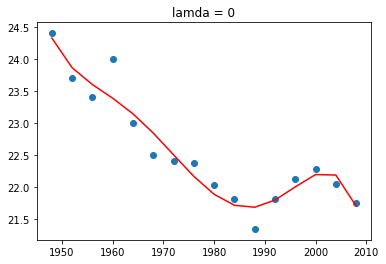

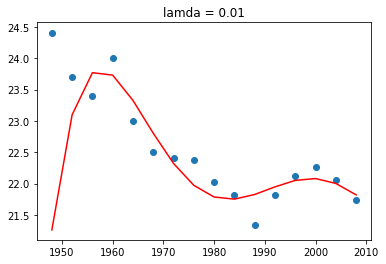

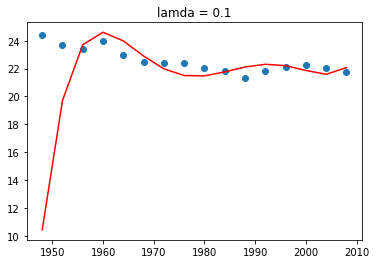

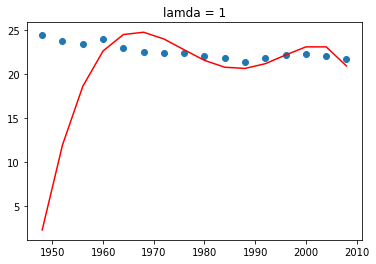

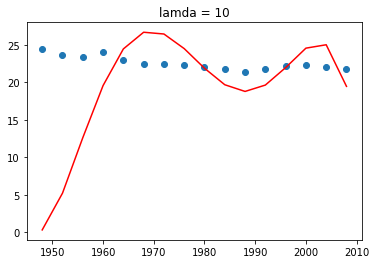

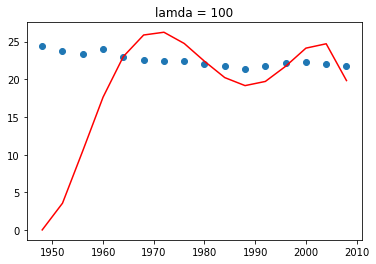

In [6]:
# Q6 
# Add L2 regularization to the code, then fit a 5th order polynomial. 
# Try several values for λ, plotting each resulting model. Which value of λ seems to fit the data the best?
# lamda 0 seems to fit the data the best

for lamb in [0,0.01,0.1,1,10,100]:
    w = np.linalg.inv(X.T@X + len(year)*lamb*np.identity(6))@X.T@time
    tempt = np.dot(X, w)
    plt.figure()
    plt.scatter(year, time)
    plt.plot(year, tempt, 'r')
    plt.title("lamda = " + str(lamb))